In [2]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "synthetic_summarization_OPRO_results_async.json"
CHOSEN_PROMPT = 'Please summarize the following text: {TEXT}'  # somewhere in promptset. Will find idx later

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

opro_results["0"]

{'Please summarize the following text: {TEXT}. Be concise and clear.': 37.2220069275273,
 '#### Instruction ####\n\n    Summarize the following text:\n\n    #### Input ####\n\n    {TEXT}\n\n    #### Expected Response Format ####\n\n    [Your summary]': 36.229205417009254,
 '**Instruction**: Summarize the following text:\n\n    **{TEXT}**\n\n    **Example:**\n\n    * Summarize the following text:\n    > The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.\n\n    ### Answer: ###\n    * The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.\n\n    **Additional Instructions:**\n\n    * Please ensure that your summary captures the key points of the text.\n    * Use clear and con

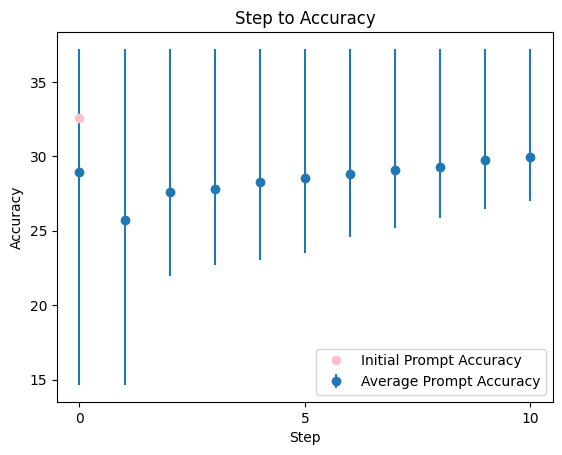

In [3]:
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

# Add a pink point to the plot
ax.plot(0, opro_results["0"][CHOSEN_PROMPT], 'o', color='pink')

# Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")


In [4]:
opro_results[str(len(opro_results) - 1)]

{'Please summarize the following text: {TEXT}. Be concise and clear.': 37.2220069275273,
 '#### Instruction ####\n\n    Summarize the following text:\n\n    #### Input ####\n\n    {TEXT}\n\n    #### Expected Response Format ####\n\n    [Your summary]': 36.229205417009254,
 '**Instruction**: Summarize the following text:\n\n    **{TEXT}**\n\n    **Example:**\n\n    * Summarize the following text:\n    > The United States is a large country with a diverse population. It is made up of 50 states, each with its own unique culture and history. The United States is a global superpower and has a significant influence on world affairs.\n\n    ### Answer: ###\n    * The United States is a large, diverse country with 50 states, each with its own unique culture and history. As a global superpower, the United States exerts significant influence on world affairs.\n\n    **Additional Instructions:**\n\n    * Please ensure that your summary captures the key points of the text.\n    * Use clear and con

In [5]:
best_instruction = max(
    opro_results[str(len(opro_results) - 1)], key=opro_results[str(len(opro_results) - 1)].get
)
print(best_instruction)

Please summarize the following text: {TEXT}. Be concise and clear.
